In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv('../data/validations-sur-le-reseau-ferre-profils-horaires-par-jour-type-1er-sem.csv', sep=';')

In [63]:
df.head()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100,110,729,REPUBLIQUE,71311.0,SAVS,5H-6H,0.61
1,100,110,734,REUILLY-DIDEROT,71654.0,DIJFP,15H-16H,8.93
2,100,110,734,REUILLY-DIDEROT,71654.0,DIJFP,2H-3H,0.01
3,100,110,734,REUILLY-DIDEROT,71654.0,DIJFP,6H-7H,1.15
4,100,110,734,REUILLY-DIDEROT,71654.0,JOHV,0H-1H,0.61


In [64]:
df.tail()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CAT_JOUR,TRNC_HORR_60,pourc_validations
82414,810,802,612,ORSAY-VILLE,62892.0,SAHV,22H-23H,1.95
82415,810,802,612,ORSAY-VILLE,62892.0,SAHV,23H-0H,1.88
82416,810,802,612,ORSAY-VILLE,62892.0,SAHV,6H-7H,2.10
82417,810,802,612,ORSAY-VILLE,62892.0,SAVS,14H-15H,7.03
82418,810,802,612,ORSAY-VILLE,62892.0,SAVS,21H-22H,2.09


In [23]:
df.columns

Index([u'CODE_STIF_TRNS', u'CODE_STIF_RES', u'CODE_STIF_ARRET',
       u'LIBELLE_ARRET', u'ID_REFA_LDA', u'CAT_JOUR', u'TRNC_HORR_60',
       u'pourc_validations'],
      dtype='object')

In [65]:
df['pourc_validations'].head()

0    0.61
1    8.93
2    0.01
3    1.15
4    0.61
Name: pourc_validations, dtype: float64

In [33]:
df.sort_values(by='pourc_validations').tail()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CAT_JOUR,TRNC_HORR_60,pourc_validations
4130,800,852,341,GUILLERVAL,59450.0,JOVS,7H-8H,86.80
5393,800,852,535,MONNERVILLE,59429.0,JOVS,7H-8H,91.35
4867,800,852,341,GUILLERVAL,59450.0,JOHV,7H-8H,92.45
5742,800,852,535,MONNERVILLE,59429.0,JOHV,7H-8H,95.51
80404,800,803,241,DOURDAN-LA-FORET,59843.0,SAVS,16H-17H,100.00


In [15]:
df.describe()

,CODE_STIF_TRNS,ID_REFA_LDA,pourc_validations
count,82419.000000,81967.000000,82419.000000
mean,502.835269,72059.742128,4.543808
std,347.290662,31803.342325,4.220036
min,100.000000,59403.000000,0.000000
25%,100.000000,66484.000000,1.330000
50%,800.000000,71124.000000,3.980000
75%,800.000000,71777.000000,6.770000
max,810.000000,415852.000000,100.000000


In [60]:
repub = df[df.LIBELLE_ARRET == 'REPUBLIQUE']
repub.head()

,CODE_STIF_TRNS,CODE_STIF_RES,CODE_STIF_ARRET,LIBELLE_ARRET,ID_REFA_LDA,CAT_JOUR,TRNC_HORR_60,pourc_validations
0,100,110,729,REPUBLIQUE,71311.0,SAVS,5H-6H,0.61
9064,100,110,729,REPUBLIQUE,71311.0,DIJFP,0H-1H,2.07
9065,100,110,729,REPUBLIQUE,71311.0,DIJFP,2H-3H,0.03
9066,100,110,729,REPUBLIQUE,71311.0,JOHV,0H-1H,1.89
9067,100,110,729,REPUBLIQUE,71311.0,JOHV,17H-18H,10.01


In [47]:
df.groupby(['LIBELLE_ARRET']).sum().head() #not meaningful, just for testing

,CODE_STIF_TRNS,ID_REFA_LDA,pourc_validations
LIBELLE_ARRET,,,
ABBESSES,11300,8071816.0,499.99
ABLON,84000,7303170.0,499.99
ACHERES-GRAND-CORMIER,83430,6714570.0,499.99
ACHERES-VILLE,90720,8243648.0,499.99
AEROPORT CHARLES DE GAULLE 1,93960,8537136.0,500.02


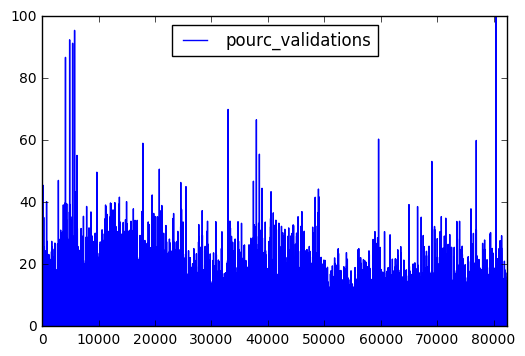

In [62]:
plt.figure();
df['pourc_validations'].plot(); #not meaningful, just for testing
plt.legend(loc='best') 